## Observations and Insights 

* For this dataset, the number of mice tested was greatest for Capomulin and Ramicane and was least for Propriva.  The division between male and female mice was split relatively evenly.
* The data for Capomulin and Ramicane showed the least variability with the lowest standard deviation and standard error of the mean.  In addition, these drugs show the smallest final tumor volume indicating effectiveness in treatment.
* For Capomulin, there is a strong correlation between the tumor volume and mouse weight with a correlation coefficient of 0.84 and an r-squared value of 0.71.  
* Capomulin and Ramicane are the most promising drug regimens in this study given the large sample size, low variability, and greatest tumor volume reduction.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single dataset
master_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
master_df

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
# Checking the number of mice in the DataFrame.
len(master_df["Mouse ID"].value_counts())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = master_df[master_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = master_df[master_df["Mouse ID"] != "g989"]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straightforward, creating multiple series and putting them all together at the end.

regimen_gb = clean_df.groupby(["Drug Regimen"])

sumstats = {"Tumor Volume Mean": regimen_gb["Tumor Volume (mm3)"].mean(),
           "Tumor Volume Median": regimen_gb["Tumor Volume (mm3)"].median(),
           "Tumor Volume Variance": regimen_gb["Tumor Volume (mm3)"].var(),
           "Tumor Volume Standard Deviation": regimen_gb["Tumor Volume (mm3)"].std(),
           "Tumor Volume SEM": regimen_gb["Tumor Volume (mm3)"].sem()}

sumstats_df = pd.DataFrame(sumstats)
                           
sumstats_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

regimen_tumor_gb = clean_df.groupby(["Drug Regimen"])

regimen_tumor_gb["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Mouse Count')

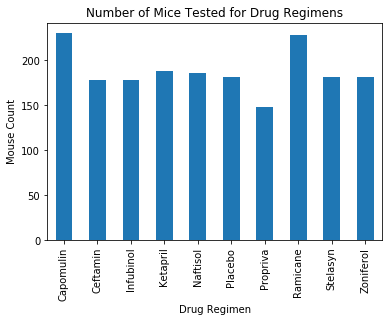

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
regimen_df = clean_df.loc[:, ["Drug Regimen", "Mouse ID", "Timepoint"]]
regimen_group = regimen_df.groupby(["Drug Regimen"])
mouse_count = regimen_group["Mouse ID"].count()

mouse_chart = mouse_count.plot(kind="bar")
mouse_chart.set_title("Number of Mice Tested for Drug Regimens")
mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Mouse Count")


Text(0, 0.5, 'Mouse Count')

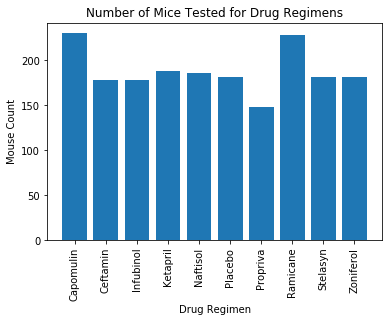

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
regimen_df = regimen_df.sort_values("Drug Regimen")
mouse = regimen_group["Mouse ID"].count()
regimen = regimen_df["Drug Regimen"].unique()

fig, ax = plt.subplots()
xlabels = regimen
plt.bar(regimen, mouse)
ax.set_xticklabels(xlabels, rotation=90, ha='center')
plt.title("Number of Mice Tested for Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

## Pie Plots

Text(0.5, 1.0, 'Mice Gender Ratio')

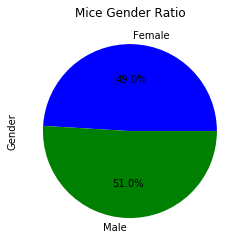

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_gb = clean_df.groupby(["Sex"])

gender = gender_gb["Sex"].value_counts()
index = gender_gb["Sex"].unique()

gender_df = pd.DataFrame({"Gender": gender})

pie_plot = gender_df["Gender"].plot.pie(y="Gender", labels=("Female", "Male"), autopct='%1.1f%%', colors=("b", "g"))
pie_plot.set_title("Mice Gender Ratio")

Text(0.5, 1.0, 'Mice Gender Ratio')

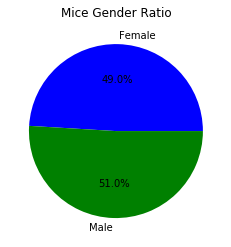

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=("Female", "Male"), autopct="%1.1f%%", colors=("b", "g"))
plt.title("Mice Gender Ratio")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
mouse_time = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

#Join last timepoint data with working data frame
mouse_df = pd.merge(mouse_time, clean_df, on=("Mouse ID", "Timepoint"), how="inner")

#Find most promising treatment - determined by the smallest tumor volume on average at the last timepoint for each mouse.
final_time_regimen_gb = mouse_df.groupby(["Drug Regimen"])

final_time_regimen_df = pd.DataFrame(final_time_regimen_gb["Tumor Volume (mm3)"].describe())
sorted_regimen_df = final_time_regimen_df.sort_values("mean")

print(f"\nThe four most promising drug regimens using the maximum timepoint are {sorted_regimen_df.index[0]}, {sorted_regimen_df.index[1]}, {sorted_regimen_df.index[2]}, and {sorted_regimen_df.index[3]}.")

#If tumor volume is the indication of promising treatment, then the above statement will print the most promising treatments.
#However, since many of the mice included in this dataset did not survive or continue the study to the final timepoint of day 45,
#another analysis using only the day 45 samples was used to deterimine the most promising treatments for the remaining
#analysis.  
time_45_df = clean_df.loc[clean_df["Timepoint"] == 45]
time_45_gb = time_45_df.groupby(["Drug Regimen"])
time_45_final_df = pd.DataFrame(time_45_gb["Tumor Volume (mm3)"].describe())
sort_time_45_df = time_45_final_df.sort_values("mean")

print(f"\nThe four most promising drug regimens for mice surviving to day 45 are {sort_time_45_df.index[0]}, {sort_time_45_df.index[1]}, {sort_time_45_df.index[2]}, and {sort_time_45_df.index[3]}.")


The four most promising drug regimens using the maximum timepoint are Ramicane, Capomulin, Propriva, and Ceftamin.

The four most promising drug regimens for mice surviving to day 45 are Ramicane, Capomulin, Ceftamin, and Infubinol.


In [15]:
# Quantitatively determine Ramicane outliers
#Note - analysis of the most promising regimens will include data for all timepoints.  
Ramicane_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Ramicane", :]

print(f"Mean: {Ramicane_df['Tumor Volume (mm3)'].mean()}")
print(f"Median: {Ramicane_df['Tumor Volume (mm3)'].median()}")
print(f"Mode: {Ramicane_df['Tumor Volume (mm3)'].mode()}")

quartiles = Ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile range: {iqr}")
print(f"Median Tumor volume: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = Ramicane_df.loc[(Ramicane_df["Tumor Volume (mm3)"] < lower_bound) | (Ramicane_df["Tumor Volume (mm3)"] > upper_bound)]
outlier_tumor

Mean: 36.1913904284
Median: 36.56165229
Mode: 0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
dtype: float64
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Median Tumor volume: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [16]:
# Quantitatively determine Capomulin outliers
Capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]

print(f"Mean: {Capomulin_df['Tumor Volume (mm3)'].mean()}")
print(f"Median: {Capomulin_df['Tumor Volume (mm3)'].median()}")
print(f"Mode: {Capomulin_df['Tumor Volume (mm3)'].mode()}")

quartiles = Capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile range: {iqr}")
print(f"Median Tumor volume: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = Capomulin_df.loc[(Capomulin_df["Tumor Volume (mm3)"] < lower_bound) | (Capomulin_df["Tumor Volume (mm3)"] > upper_bound)]
outlier_tumor

Mean: 36.6675677192
Median: 38.125164399999996
Mode: 0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
dtype: float64
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range: 7.781863460000004
Median Tumor volume: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [17]:
# Quantitatively determine Ceftamin outliers
Ceftamin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Ceftamin", :]

print(f"Mean: {Ceftamin_df['Tumor Volume (mm3)'].mean()}")
print(f"Median: {Ceftamin_df['Tumor Volume (mm3)'].median()}")
print(f"Mode: {Ceftamin_df['Tumor Volume (mm3)'].mode()}")

quartiles = Ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile range: {iqr}")
print(f"Median Tumor volume: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = Ceftamin_df.loc[(Ceftamin_df["Tumor Volume (mm3)"] < lower_bound) | (Ceftamin_df["Tumor Volume (mm3)"] > upper_bound)]
outlier_tumor

Mean: 57.7539768252
Median: 59.85195552
Mode: 0    45.0
dtype: float64
Lower quartile: 48.72207785
Upper quartile: 64.29983003
Interquartile range: 15.577752179999997
Median Tumor volume: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [18]:
# Quantitatively determine Infubinol outliers
Infubinol_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Infubinol", :]

print(f"Mean: {Infubinol_df['Tumor Volume (mm3)'].mean()}")
print(f"Median: {Infubinol_df['Tumor Volume (mm3)'].median()}")
print(f"Mode: {Infubinol_df['Tumor Volume (mm3)'].mode()}")

quartiles = Infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile range: {iqr}")
print(f"Median Tumor volume: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = Infubinol_df.loc[(Infubinol_df["Tumor Volume (mm3)"] < lower_bound) | (Infubinol_df["Tumor Volume (mm3)"] > upper_bound)]
outlier_tumor

Mean: 58.1782457852
Median: 60.16518046
Mode: 0     36.321346
1     45.699331
2     46.250112
3     47.010364
4     50.005138
5     51.542431
6     54.048608
7     54.656549
8     55.629428
9     55.650681
10    57.031862
11    58.268442
12    60.165180
13    60.918767
14    60.969711
15    62.117279
16    62.435404
17    62.754451
18    65.525743
19    66.083066
20    66.196912
21    67.289621
22    67.685569
23    67.973419
24    72.226731
dtype: float64
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Median Tumor volume: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
31,c326,5,36.321346,0,Infubinol,Female,18,25


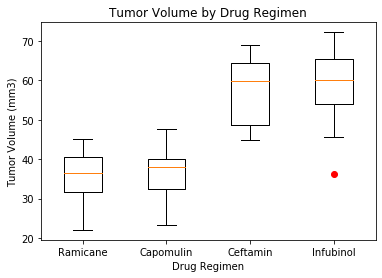

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#
#Subset data by drug regimen
Ramicane = mouse_df.loc[(mouse_df["Drug Regimen"] == "Ramicane" )]
Capomulin = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin" )]
Ceftamin = mouse_df.loc[(mouse_df["Drug Regimen"] == "Ceftamin" )]
Infubinol = mouse_df.loc[(mouse_df["Drug Regimen"] == "Infubinol" )]

#set plot specifications
fig, ax = plt.subplots()
Best_Regimen = [Ramicane["Tumor Volume (mm3)"], Capomulin["Tumor Volume (mm3)"], Ceftamin["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"]]
ax.boxplot(Best_Regimen, False, "r", labels=["Ramicane", "Capomulin", "Ceftamin", "Infubinol"])
plt.title("Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()


## Line and Scatter Plots

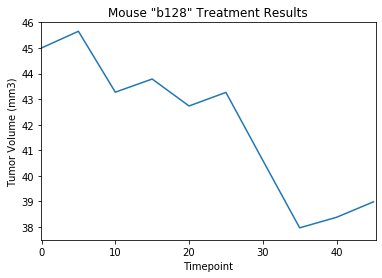

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Select a mouse from the Capomulin treatment set
capomulin_mouse_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "b128"), :]

#set plot specifications
plt.plot(capomulin_mouse_df["Timepoint"], capomulin_mouse_df["Tumor Volume (mm3)"])
plt.title('Mouse "b128" Treatment Results')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-.1, 45.3)
plt.ylim(37.5, 46)
plt.show()

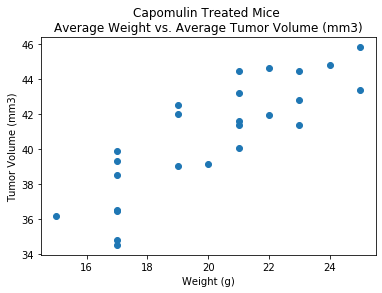

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
plt.scatter(capomulin_df["Weight (g)"].groupby(capomulin_df["Mouse ID"]).mean(),
            capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df["Mouse ID"]).mean())
plt.title("Capomulin Treated Mice \nAverage Weight vs. Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84
The r square value is 0.71.


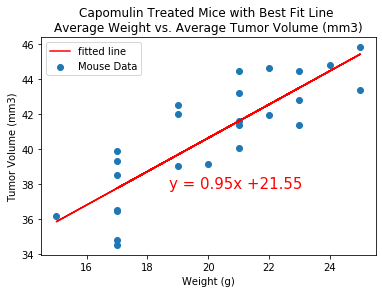

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#mouse average weight and average tumor volume calculations
weight = capomulin_df["Weight (g)"].groupby(capomulin_df["Mouse ID"]).mean()
avg_tumor_vol = capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df["Mouse ID"]).mean()

#Pearson correlation coefficient
correlation = sts.pearsonr(weight, avg_tumor_vol)

#linear regression equation
slope, intercept, r_value, p_value, std_err = sts.linregress(weight, avg_tumor_vol)

fit = slope * weight + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot avg weight vs avg tumor vol and regression line
plt.scatter(weight, avg_tumor_vol, label="Mouse Data")
plt.plot(weight, fit, "r", label="fitted line")
plt.annotate(line_eq, (18.7, 37.8), fontsize=15, color="red")
plt.title("Capomulin Treated Mice with Best Fit Line \nAverage Weight vs. Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r square value is {round(r_value**2, 2)}.")
plt.show()